# Prediksi Churn untuk Bank

Pada jaman sekarang, jumlah bank sudah sangat banyak sehingga setiap bank memiliki keinginan untuk menjadi nomor 1 di industri perbankan. Salah satu cara untuk berkompetisi dalam industri perbankan yaitu meningkatkan pangsa pasar alias meningkatkan seberapa besar penjualan di industri bank dengan mendapatkan customer baru sebanyak-banyaknya.

Namun upaya tersebut terbilang kurang menguntungkan bagi pihak bank karena dalam kenyataannya untuk mendapatkan sebuah nasabah baru memerlukan biaya yang lebih tinggi dibandingkan mempertahankan sebuah nasabah. Sehingga bank memerlukan upaya strategi lain yaitu, meningkatkan *retention rate*. Pastinya bank yang memiliki nasabah yang setia dapat meningkatkan pendapatan bagi perusahaan.

> #### Sehingga, apa itu *Retention Rate*?
>
> *Retention rate* merupakan sebuah ukuran agar perusahaan tahu apakah program mereka dalam mempertahankan sebuah customer atau pelanggan berhasil atau justru sebuah pemborosan pada perusahaan.

## Import library yang kita butuhkan

In [67]:
import warnings
warnings.filterwarnings('ignore')
# import library untuk data processing

import pandas as pd
import numpy as np

# import library untuk data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import library untuk data scaling
from sklearn.preprocessing import StandardScaler

# import library untuk data balancing
from imblearn.over_sampling import SMOTE

# import library untuk model machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# import lirary untuk model evaluasi
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, recall_score, precision_score

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix,auc
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve

#### Library Settings

In [2]:
sns.set_style("whitegrid")
%matplotlib inline

## Exploratory Data Analysis



### Import dataset kita
Kita akan melakukan import dengan library `pandas` dan kita akan intip seperti apa dataset kita.

Untuk nama dataset kita yaitu `Churn_Modelling.csv`.

In [3]:
# import dataset Churn_Modelling.csv
df = pd.read_csv('Churn_Modelling.csv', index_col='RowNumber')

# menampilkan 5 baris teratas pada dataset
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# menampilkan informasi dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
# menampilkan jumlah unique value pada setiap kolom
df.nunique()

CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

#### Penjelasan

Dari beberapa output diatas kita dapat mengetahui kira-kira seperti apa isi dari dataset kita, dan kita menemukan:
- Dataset ini berisi 13 kolom
- Terdapat 10 ribu baris alias 10 ribu data customer
- Dari 13 kolom menurut `.info()` 10 diantaranya bertipe numerik dan 3 kolom bertipe kategori

Namun kita telah menampilkan jumlah value yang unik pada setiap kolom di dataset kita, untuk kolom `HasCrCard`, `IsActiveMember` dan `Exited` walaupun isi datanya numerik namun akan kita anggap valuenya sebagai kategori. Selain itu kolom **Exited** merupakan kolom target kita yaitu setiap nasabah akan ditandai keluar dari bank(1) atau tidak keluar (0).

Dibawah ini merupakan dokumentasi untuk penjelasan makna setiap kolom:
- Surname: nama panggilan dari nasabah
- CreditScore: jumlah credit score pada nasabah
- Geography: negara dari nasabah (Germany/France/Spain)
- Gender: jenis kelamin nasabah (Female/Male)
- Age: umur nasabah
- Tenure: berapa lama sudah menjadi nasabah (tahun)
- Balance: saldo nasabah
- NumOfProducts: berapa product yang dipakai nasabah
- HasCrCard: apakah nasabah memiliki kartu atau tidak
- IsActiveMember: apakah nasabah menjadi membership pada bank
- EstimatedSalary: perkiraan penghasilan nasabah
- Exited: apakah nasabah churn atau tidak

### Cek distribusi dari kolom

In [6]:
# menampilkan basic statistic
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
Exited,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


Dari metode `descirbe()` kita dapat melihat beberapa arti dari statistik.

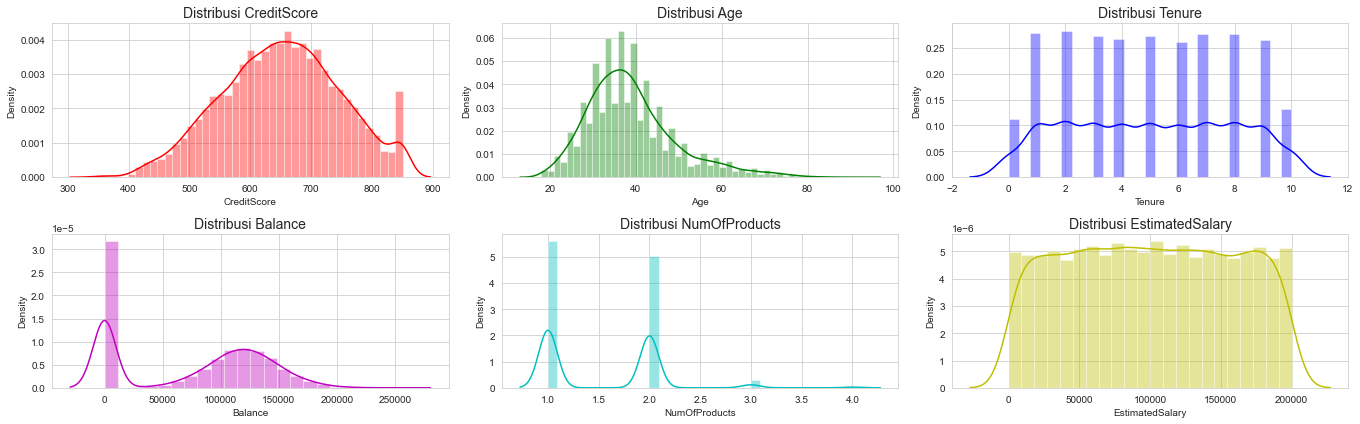

In [7]:
# deklarasi kolom numerik
nums = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# cat
cat = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']

# Cek distribusi
warna = ['r', 'g', 'b', 'm', 'c', 'y']
# mari kita visualisasi
plt.figure(figsize=(19,6))
for i in range(0, len(nums)):
    # kita tentuin berapa plot dalam satu figure
    plt.subplot(2, 3, i+1)
    _ = sns.distplot(df[nums[i]], color=warna[i])
    _.set_title('Distribusi '+str(nums[i]), fontsize=14)
    plt.tight_layout()

**Dari gambar diatas**

1. Credit Score

Memiliki distribusi yang hampir normal dengan mean 650 dan median 652.

2. Age

Memiliki skewed positif dengan mean 38 dan median 37. Walaupun mean dan median berbeda satu tahun namun terlihat di distribusi kolom age mungkin terdapat outliers.

3. Tenure

Memiliki distribusi normal. Mean 5 dan median 5

4. Balance

Memiliki distribusi dengan 2 puncak yang menunjukkan bahwa terdapat customer yang tidak memiliki tabungan dan memiliki tabungan. 

5. Num of Product

Dari distribusi kita bisa melihat banyak customer yang menggunakan 1 produk serta ada juga yang menggunakan lebih dari satu produk di bank tersebut.

6. Estimated Salary

kolom ini memiliki distribusi hampir normal karena mean bernilai 100900 dan median 100193.

#### Distribusi dengan log

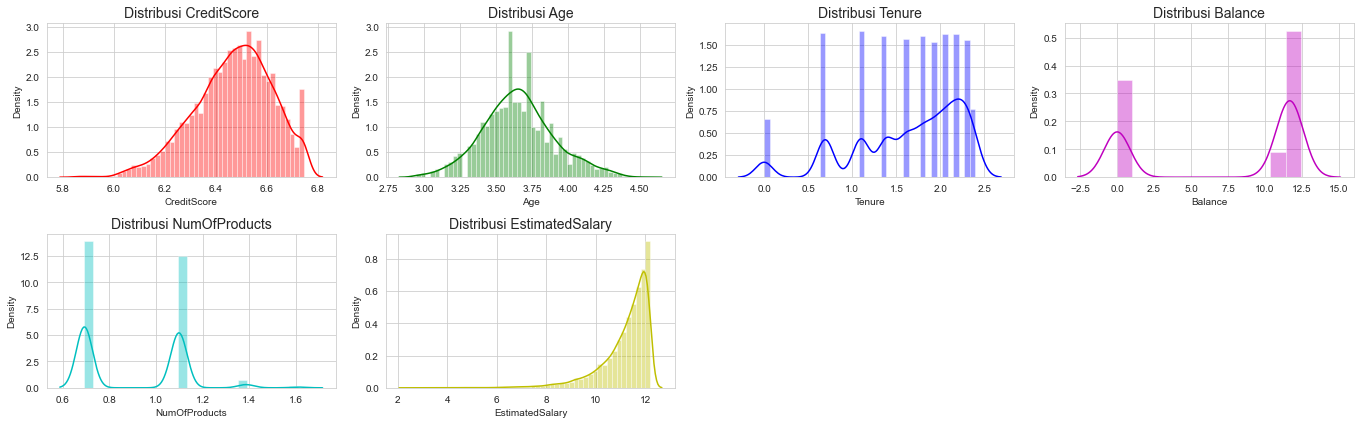

In [8]:
# Cek distribusi
warna = ['r', 'g', 'b', 'm', 'c', 'y']
# mari kita visualisasi
plt.figure(figsize=(19,6))
for i in range(0, len(nums)):
    # kita tentuin berapa plot dalam satu figure
    plt.subplot(2, 4, i+1)
    _ = sns.distplot(np.log(df[nums[i]]+1), color=warna[i])
    _.set_title('Distribusi '+str(nums[i]), fontsize=14)
    plt.tight_layout()

Dengan melakukan visualisasi dengan log transformation ada kolom yang distribusinya menjadi normal seperti `Age`.

### Cek missing values

In [9]:
# menampilkan jumlah missing value pada setiap kolom
df.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Pada dataset kita tidak terdapat missing value berupa NaN.

In [10]:
df.sample(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
9592,15649211,Fokina,708,Spain,Male,40,8,83015.71,1,1,0,101089.76,0
7369,15751137,Lei,850,Germany,Female,36,3,169025.83,1,1,0,174235.06,0
5859,15757867,Bray,570,France,Female,30,10,176173.52,1,1,0,97045.32,1
9877,15578374,Gilroy,620,Spain,Male,36,7,169312.72,1,1,0,45414.09,0
878,15800228,Bednall,652,Spain,Female,42,4,0.00,2,1,1,38152.01,0
6461,15688395,Lane,582,France,Male,29,4,0.00,2,0,0,156153.27,0
6060,15627854,Mai,707,Spain,Male,44,3,0.00,2,1,1,135077.01,0
5477,15723864,Lucas,828,Spain,Male,47,1,109876.82,2,1,0,83611.45,1
5780,15723950,Kruglov,684,Spain,Male,40,2,70291.02,1,1,1,115468.84,1


Setelah kita menampilkan 10 baris sample juga tidak menemukan adanya data missing value yang tidak standard.

### Cek Duplicate value

In [11]:
df.duplicated(subset=None, keep='first').value_counts()

False    10000
dtype: int64

Selain itu juga tidak terdapat data duplikasi pada dataset Churn_modelling.csv

### Cek Outliers

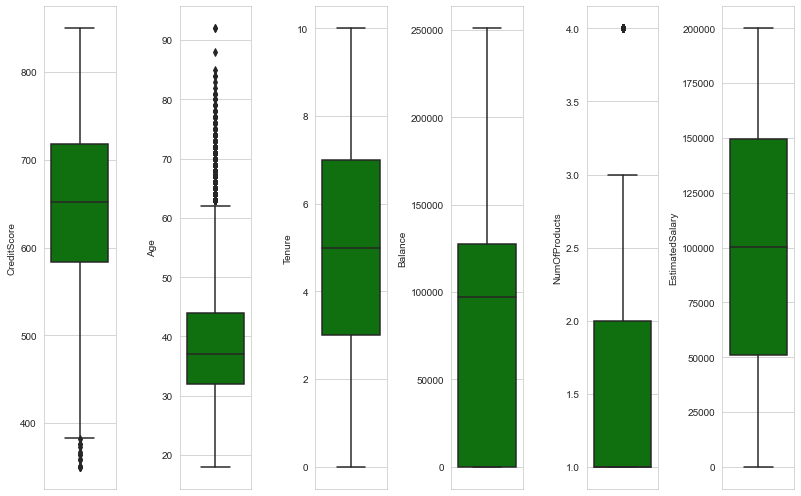

In [12]:
# visualisasi outliers
plt.figure(figsize=(15,7))
for i in range(0, len(nums)):
    plt.subplot(1, 8, i+1)
    sns.boxplot(y=df[nums[i]],color='green',orient='v')
    plt.tight_layout()

Pada kolom CreditScore dan Age terdapat banyak data outliers.

### Cek handling outliers dengan IQR

In [13]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))
for col in ['CreditScore', 'Age']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries
no_outliers = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(no_outliers)}')

Jumlah baris sebelum memfilter outlier: 10000
Jumlah baris setelah memfilter outlier: 9626


### Visualisasi data setelah handling outliers

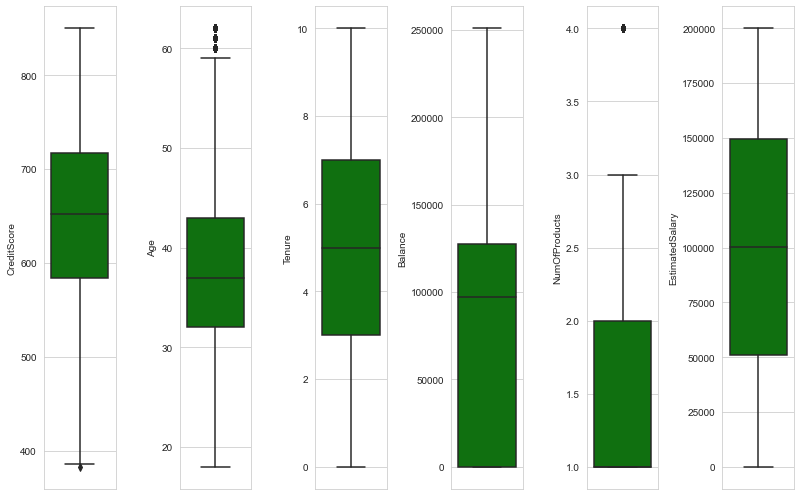

In [14]:
# visualisasi outliers
plt.figure(figsize=(15,7))
for i in range(0, len(nums)):
    plt.subplot(1, 8, i+1)
    sns.boxplot(y=no_outliers[nums[i]],color='green',orient='v')
    plt.tight_layout()

Dari boxplot diatas, outliers dari kolom `Age` dan `CreditScore` telah teratasi.

### Cek apakah target kita balance atau tidak

0    7963
1    2037
Name: Exited, dtype: int64


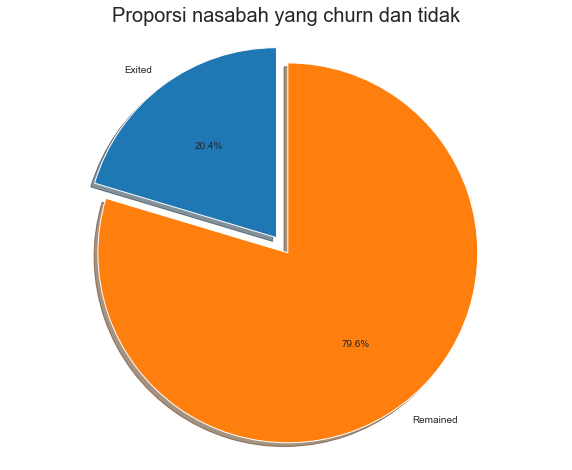

In [15]:
labels = 'Exited', 'Remained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proporsi nasabah yang churn dan tidak", size = 20)

print(df.Exited.value_counts())

Ternyata data target kita tidak seimbang, terdapat lebih dari 7900 nasabah tidak churn dan sekitar 2000 nasabah churn dari bank. Hal ini sangat wajar karena pada kehidupan nyata proporsi nasabah churn lebih sedikit dari nasabah yang tidak churn.

### Cek Kolom Numerik vs Exited

In [16]:
df_remained = df[df['Exited'] == 0]
df_churned = df[df['Exited'] == 1]

colors = ['#00A5E0', '#DD403A']

def plot_continuous(feature):
    
#     temp_totals = totals.values.tolist()*n_hues
    
        
    fig, ax1 = plt.subplots(1, 1, figsize = (12, 4))
    
    sns.histplot(df_remained[feature], bins = 15, color = colors[0], label = 'Remained', ax = ax1, kde = True)
    sns.histplot(df_churned[feature], bins = 15, color = colors[1], label = 'Churned', ax = ax1, kde = True)

    ax1.set_title('{} distribution - Histogram'.format(feature))
    ax1.set_ylabel('Counts')
    ax1.legend()

    plt.tight_layout();

ga exit: 7963
exit: 2037


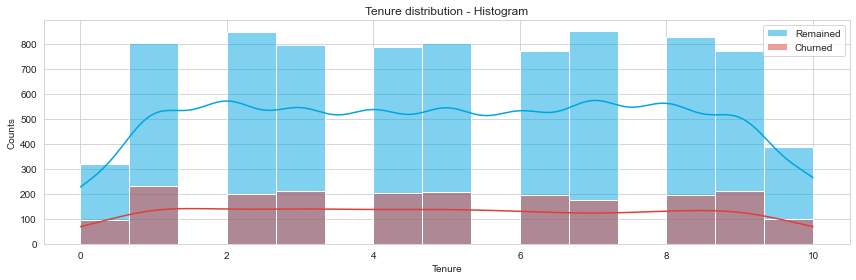

In [17]:
# visualisasi outliers
plot_continuous('Tenure')

print('ga exit:', len(df_remained))
print('exit:', len(df_churned))

Dari hasil visualisasi Tenure vs Exited, sayangnya tidak temukan perbedaan yang signifikan dari distribusi customer Churned vs Retained

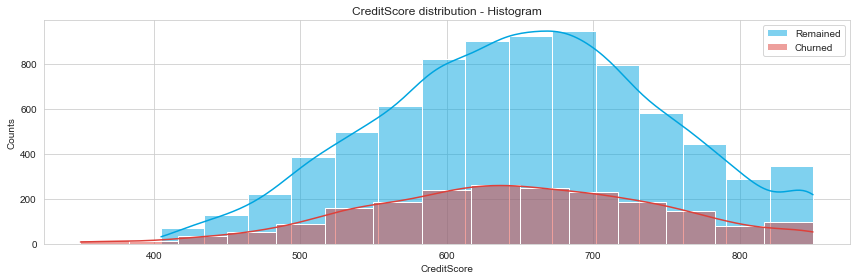

In [18]:
plot_continuous('CreditScore')

Berdasarkan CreditScore juga tidak terdapat perbedaan yang signifikan.

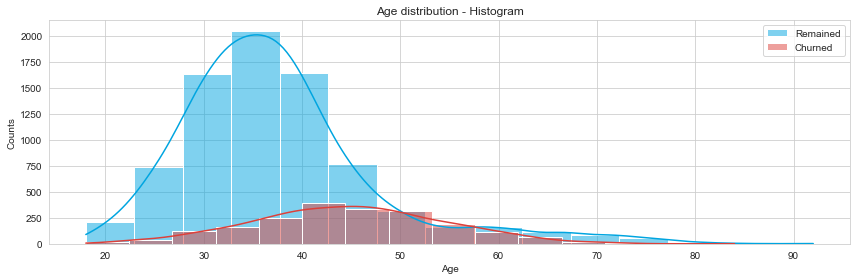

In [19]:
plot_continuous('Age')

Menariknya pada Age, terdapat distribusi yang berbeda antara Churned dan Retained. Retained memiliki skewed positif sedangkan Churned cenderung normal. Artinya, terdapat potensi perubahan nasabah menjadi churn seiring bertambahnya umur si nasabah. Kemungkinan bank belum memberikan sebuah program untuk menanggulangi hal tersebut.

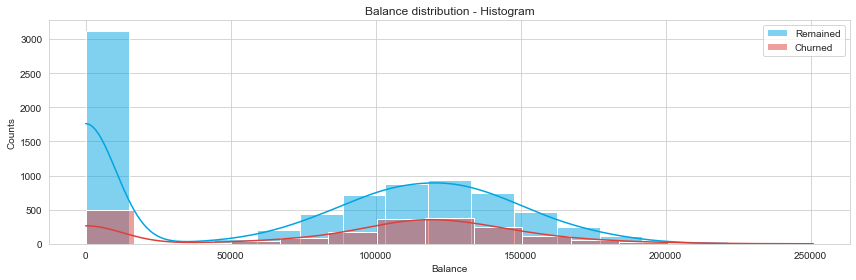

In [20]:
plot_continuous('Balance')

Lagi-lagi, distribusi Churned dan Retained pada Balance memiliki kemiripan.

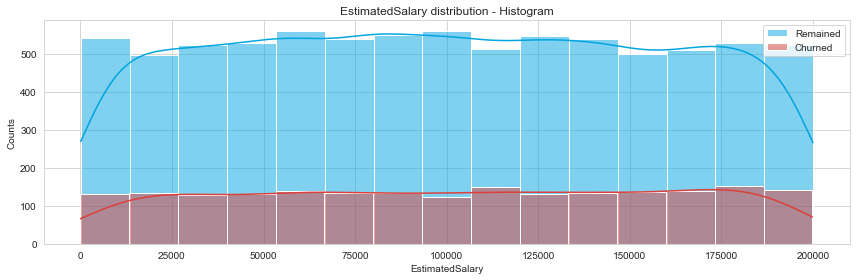

In [21]:
plot_continuous('EstimatedSalary')

Kedua distribusi tidak ada perbedaan yang signifikan, sehingga kemungkinan Pendapatan nasabah tidak mempengaruhi nasabah akan churn atau tidak.

### Cek kolom Kategorikal vs Exited

In [22]:
def plot_categories(data):
    totals = df[data].value_counts()
    n_hues = df['Exited'].unique().size

    fig, ax = plt.subplots(figsize = (15,7))

    ax = sns.countplot(df[data], hue=df['Exited'], order=totals.index, palette='coolwarm')

    plt.title(" Presentase customer yang CHURN berdasarkan "+str(data),fontsize=20)
    plt.tight_layout()

    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    temp_totals = totals.values.tolist()*n_hues
    for p,t in zip(ax.patches,temp_totals):
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{0:.1%}'.format(height/t),
            ha="center", fontsize=20)

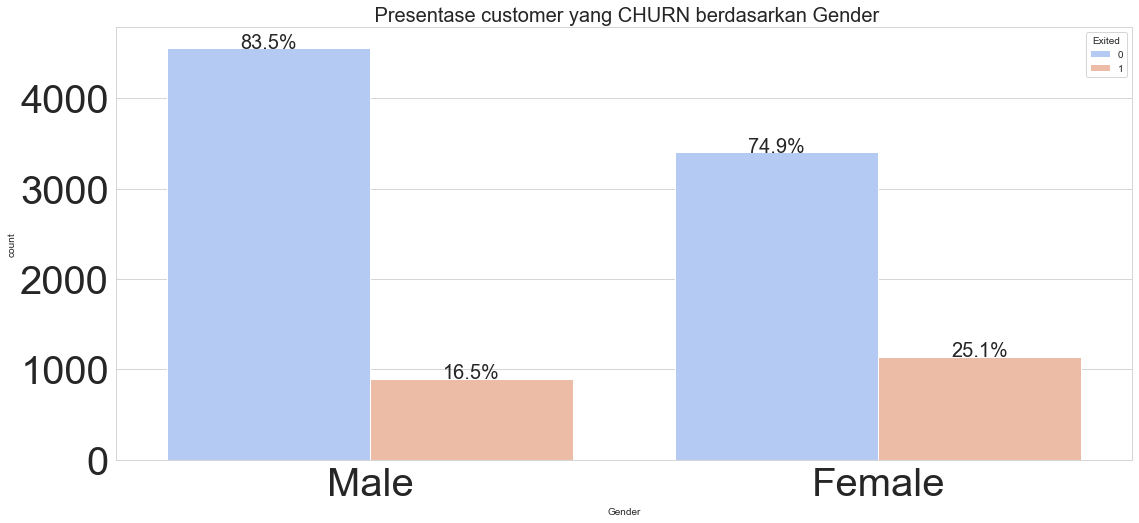

In [23]:
plot_categories('Gender')

posx and posy should be finite values
posx and posy should be finite values


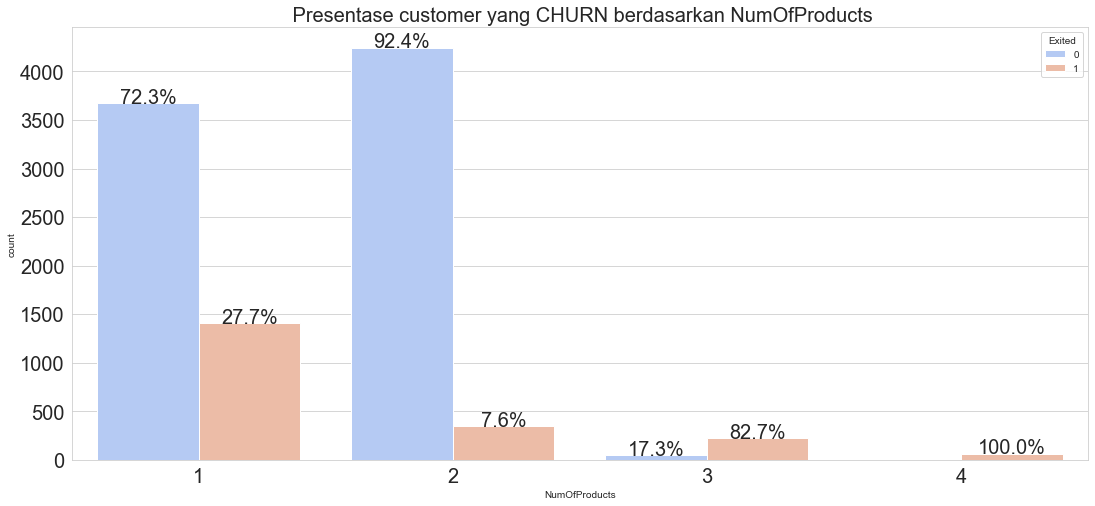

In [23]:
plot_categories('NumOfProducts')

Walaupun jumlah nasabah lebih banyak laki-laki, namun jumlah nasabah perempuan churned lebih banyak dengan total perempuan yang churn lebih dari 1000 nasabah.

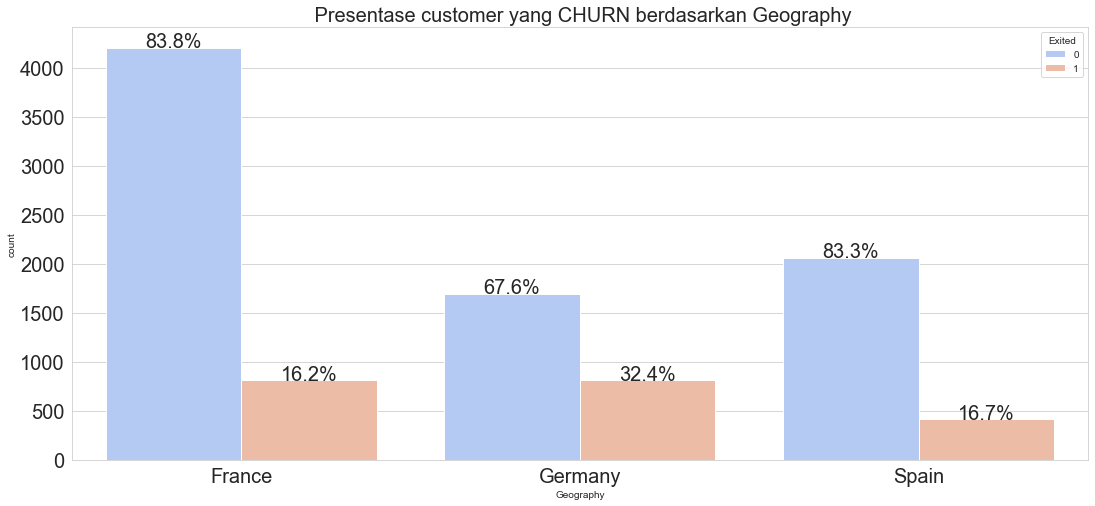

In [24]:
plot_categories('Geography')

Meskipun jumlah nasabah German paling sedikit namun German memiliki Churn rate paling tinggi, artinya onboarding proses belum berhasil. Selain itu kemungkinan bank belum membuat program untuk mempertahankan nasabah di Jerman. Sedangkan di Perancis program onboarding mereka dapat dikatakan sudah berhasil, karena Perancis memiliki jumlah nasabah terbanyak dengan churn rate yang paling kecil.

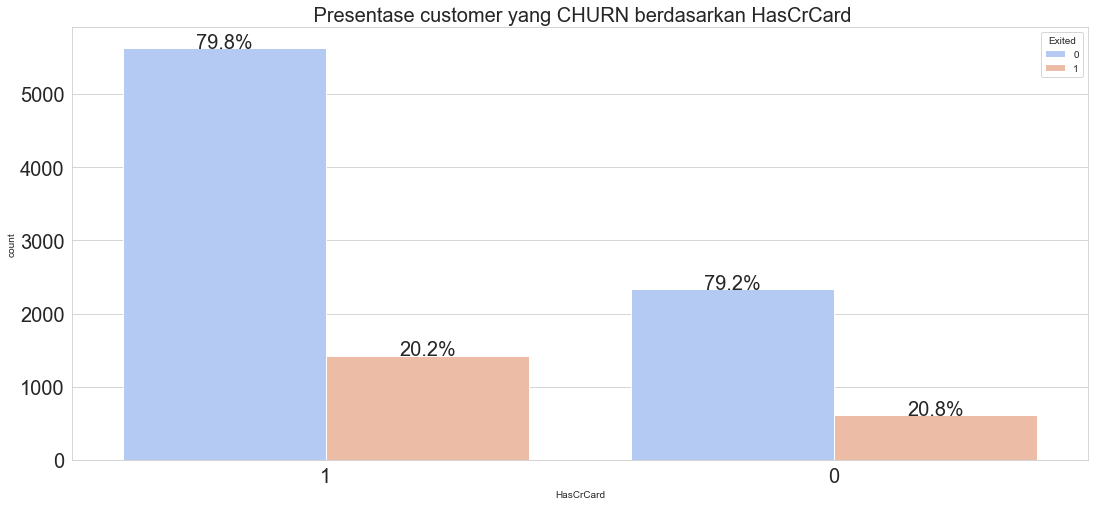

In [25]:
plot_categories('HasCrCard')

Tidak terdapat perbedaan churn rate antara nasabah yang memiliki kartu dan tidak.

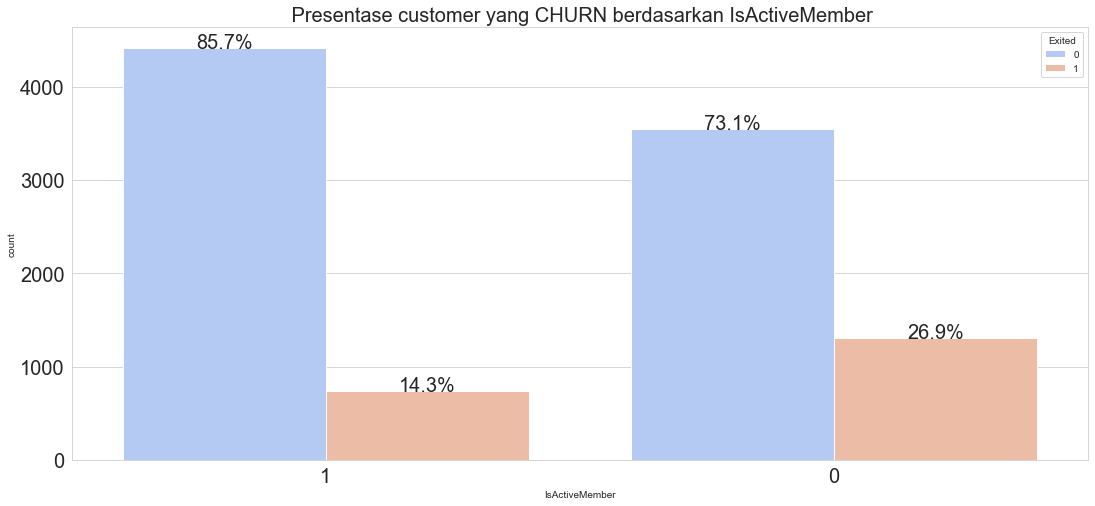

In [26]:
plot_categories('IsActiveMember')

Terlihat jelas perbedaan Churn rate antara nasabah aktif dan tidak aktif. Nasabah yang tidak aktif memiliki churn rate sebesar 26.9% sedangkan nasabah yang aktif hanya 14.3%

## Data pre-processing

### Log transformation

In [27]:
for col in ['CreditScore', 'Age']:
    df[col] = np.log(df[col]+1)

### Handle outliers

In [28]:
print(f'Jumlah baris setelah memfilter outlier: {len(df)}')
filtered_entries = np.array([True] * len(df))
for col in ['CreditScore', 'Age']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries
    
df = df[filtered_entries]
print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris setelah memfilter outlier: 10000
Jumlah baris setelah memfilter outlier: 9738


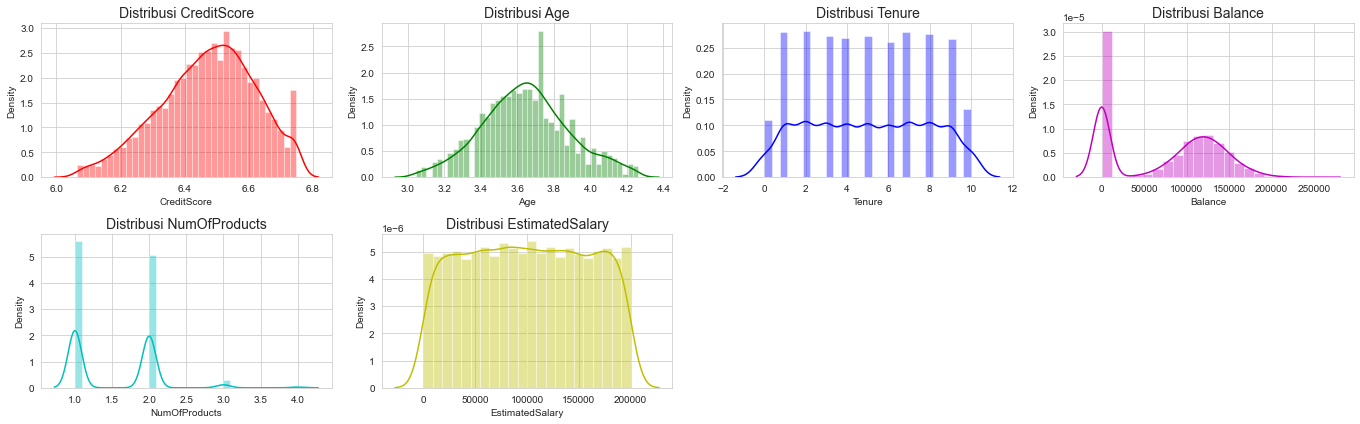

In [30]:
# Cek distribusi
warna = ['r', 'g', 'b', 'm', 'c', 'y']
# mari kita visualisasi
plt.figure(figsize=(19,6))
for i in range(0, len(nums)):
    # kita tentuin berapa plot dalam satu figure
    plt.subplot(2, 4, i+1)
    _ = sns.distplot(df[nums[i]], color=warna[i])
    _.set_title('Distribusi '+str(nums[i]), fontsize=14)
    plt.tight_layout()

### One-hot Ecoding

In [31]:
one_hot = pd.get_dummies(df[['Gender', 'Geography']])

df = df.join(one_hot)
df.drop(df[['Geography','Gender']], inplace=True, axis=1)

[Text(0.5, 0, 'CustomerId'),
 Text(1.5, 0, 'CreditScore'),
 Text(2.5, 0, 'Age'),
 Text(3.5, 0, 'Tenure'),
 Text(4.5, 0, 'Balance'),
 Text(5.5, 0, 'NumOfProducts'),
 Text(6.5, 0, 'HasCrCard'),
 Text(7.5, 0, 'IsActiveMember'),
 Text(8.5, 0, 'EstimatedSalary'),
 Text(9.5, 0, 'Exited'),
 Text(10.5, 0, 'Gender_Female'),
 Text(11.5, 0, 'Gender_Male'),
 Text(12.5, 0, 'Geography_France'),
 Text(13.5, 0, 'Geography_Germany'),
 Text(14.5, 0, 'Geography_Spain')]

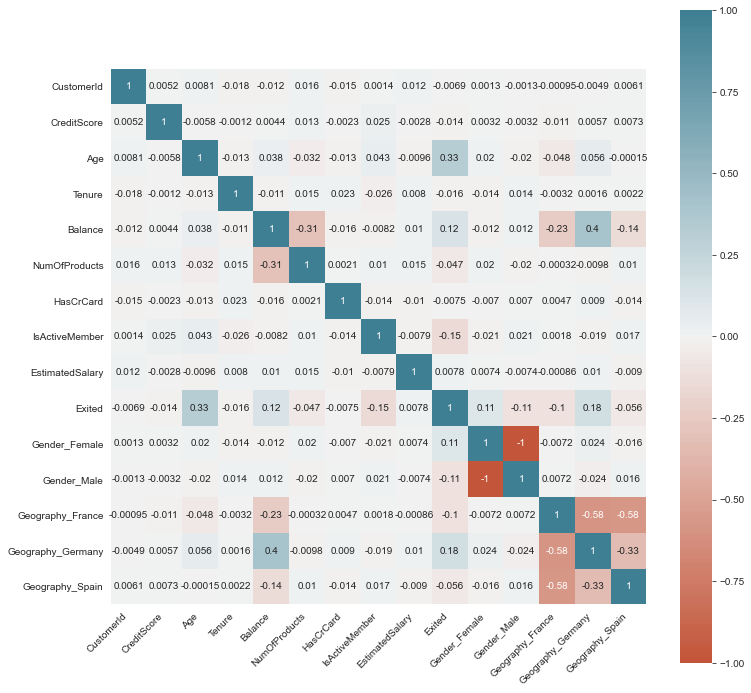

In [32]:
# mencari korelasi pada setiap kolom
corr = df.corr()
# visualisasi korelasi yang sudah dicari
plt.figure(figsize=(12,12))
_ = sns.heatmap(corr, vmin=-1, vmax=1, center=0, square=True, cmap=sns.diverging_palette(20, 220, n=200), annot = True)
_.set_xticklabels(_.get_xticklabels(), rotation=45, horizontalalignment='right')

Banyak feature yang berkorelasi lemah terhadap target, feature yang terlihat berkorelasi positif hanya Age, Balance dan EstimatedSalary namun ketiganya masih sangat lemah.

### Feature Engineering

In [33]:
# Menghitung ratio Saldo per Gaji
df['balance_salary_ratio'] = df.Balance/df.EstimatedSalary
# Menghitung ratio Tenure per Gaji
df['tenure_by_age'] = df.Tenure/(df.Age)
# Menghitung skor kredit per umur
df['credit_score_by_age'] = df.CreditScore/(df.Age)

In [36]:
scaler = StandardScaler()

scl_columns = ['CreditScore', 'Balance']
df[scl_columns] = scaler.fit_transform(df[scl_columns])

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import itertools


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):



    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
    
    
def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))

### Split data

In [55]:
X = df.drop(['Surname','CustomerId','Exited','EstimatedSalary','Tenure', 'HasCrCard','CreditScore'],axis=1)
Y = df.Exited.values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

### Balancing data train

In [56]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority',random_state=42)

X_train,y_train = undersample.fit_resample(X_train, y_train)
"""
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

"""

'\nsmote = SMOTE(random_state=42)\nX_train, y_train = smote.fit_resample(X_train, y_train)\n\n'

In [57]:
pd.Series(y_train).value_counts()

0    1402
1    1402
dtype: int64

In [58]:
X_train

,Age,Balance,NumOfProducts,IsActiveMember,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain,balance_salary_ratio,tenure_by_age,credit_score_by_age
0,3.688879,0.768080,2,0,0,1,0,1,0,0.838422,2.710850,1.680865
1,4.127134,-1.229197,2,1,1,0,0,0,1,0.000000,1.938391,1.579939
2,3.784190,0.591582,1,0,0,1,0,0,1,1.268303,1.585544,1.664058
3,3.583519,0.535667,1,1,0,1,0,0,1,1.002605,1.395277,1.774673
4,3.784190,1.625782,1,0,1,0,1,0,0,1.612906,1.849802,1.723122
...,...,...,...,...,...,...,...,...,...,...,...,...
2799,3.761200,-1.229197,1,1,1,0,1,0,0,0.000000,0.000000,1.735216
2800,3.761200,-1.229197,2,0,0,1,0,0,1,0.000000,1.595236,1.705598
2801,3.433987,-1.229197,2,1,1,0,1,0,0,0.000000,0.582413,1.900985
2802,3.828641,0.639969,1,0,1,0,0,1,0,0.615461,2.350703,1.747900


## Modeling

In [52]:
def evaluation(model, X_train, X_test, y_train, y_test):
    print('Accuracy on Training Set: ', logreg.score(X_train, y_train))
    print('Accuracy on Test Set: ', logreg.score(X_test, y_test))
    print('')
    print("Mean Absolute Error on Training Set: ",mean_absolute_error(y_train, model.predict(X_train)))
    print("Mean Absolute Error on Testing Set: ",mean_absolute_error(y_test,model.predict(X_test)))
    print('')
    print("Root MSE on Training Set:", mean_squared_error(y_train, model.predict(X_train), squared=False))
    print("Root MSE on Test Set:", mean_squared_error(y_test, model.predict(X_test), squared=False))
    print('')
    print("R-Squared Score on Training Set: ",r2_score(y_train, model.predict(X_train)))
    print("R-Squared Score on Testing Set: ",r2_score(y_test, model.predict(X_test)))
    print('')
    print("Recall Score on Training Set: ",recall_score(y_train, model.predict(X_train)))
    print("Recall Score on Testing Set: ",recall_score(y_test, model.predict(X_test)))
    print('')
    print("Precision Score on Training Set: ",precision_score(y_train, model.predict(X_train)))
    print("Precision Score on Testing Set: ",precision_score(y_test, model.predict(X_test)))

### Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression



lr = LogisticRegression(random_state = 42)

hyperparameters = {'max_iter' : [100],
              'penalty' : ['l1', 'l2'],
              'C' : [0.001, 0.01, 0.1, 1, 10],
              'solver' : ['lbfgs', 'liblinear']}

lr_model = RandomizedSearchCV(lr, hyperparameters, scoring = 'recall', 
                      cv = 5, random_state=42,n_jobs = -1)

best_lr_model = lr_model.fit(X_train, y_train)

In [63]:
print(classification_report(y_train, best_lr_model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.71      0.69      0.70      1402
           1       0.70      0.72      0.71      1402

    accuracy                           0.70      2804
   macro avg       0.70      0.70      0.70      2804
weighted avg       0.70      0.70      0.70      2804



In [64]:
print(classification_report(y_test, best_lr_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.70      0.79      2334
           1       0.38      0.71      0.49       588

    accuracy                           0.70      2922
   macro avg       0.64      0.71      0.64      2922
weighted avg       0.80      0.70      0.73      2922



In [65]:
y_pred = best_lr_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

In [68]:
eval_classification(best_lr_model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.70
Precision (Test Set): 0.38
Recall (Test Set): 0.71
F1-Score (Test Set): 0.49
AUC: 0.71


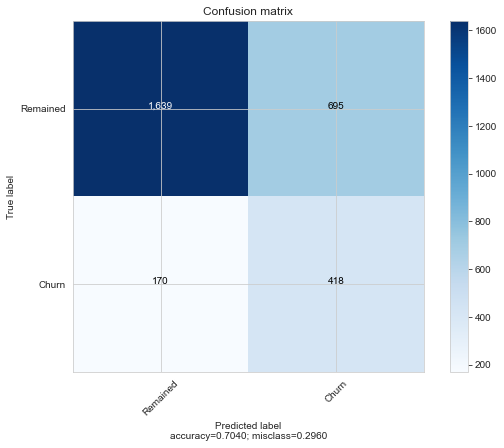

In [69]:
plot_confusion_matrix(cm=cm,normalize= False,target_names = ['Remained', 'Churn'])

### Random Forest 

In [72]:
from sklearn.ensemble import RandomForestClassifier

hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)],
                       bootstrap = [True], 
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],  
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], 
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], 
                       max_features = ['auto', 'sqrt', 'log2'], 
                       n_jobs = [-1], 
                      )

"""
hyperparameters = {"max_features": ["log2","auto","sqrt"],
                "min_samples_split":[2,3,5],
                "min_samples_leaf":[1,3,5],
                "bootstrap":[True,False],
                "n_estimators":[50,100,150],
                "criterion":["gini","entropy"]}
"""
rf = RandomForestClassifier(random_state=42)
rf_model = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, scoring='recall')
best_rf_model= rf_model.fit(X_train,y_train)

In [73]:
print(classification_report(y_train, best_rf_model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1402
           1       0.85      0.80      0.83      1402

    accuracy                           0.83      2804
   macro avg       0.83      0.83      0.83      2804
weighted avg       0.83      0.83      0.83      2804



In [74]:
print(classification_report(y_test, best_rf_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      2334
           1       0.49      0.75      0.59       588

    accuracy                           0.79      2922
   macro avg       0.71      0.78      0.72      2922
weighted avg       0.84      0.79      0.80      2922



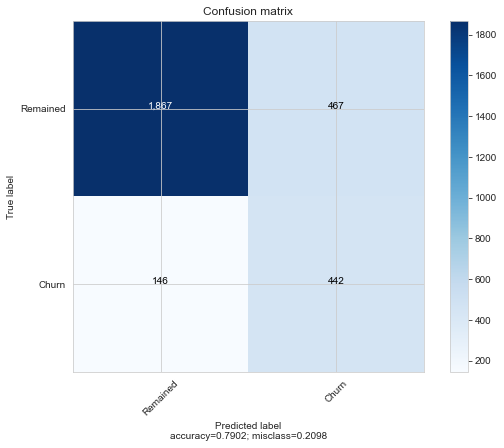

In [75]:
y_pred = best_rf_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cm=cm,normalize= False,target_names = ['Remained', 'Churn'])

In [76]:
eval_classification(best_rf_model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.79
Precision (Test Set): 0.49
Recall (Test Set): 0.75
F1-Score (Test Set): 0.59
AUC: 0.78


### XGBoost

In [77]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
XGB = XGBClassifier()


hyperparameters = {'n_estimators': [50],
              'learning_rate': [0.001, 0.79],
              'max_depth': [3, 4, 5, 6, 7, 8, 9],                # default=6
              'reg_alpha': [1, 2],
              'reg_lambda': [1, 2],
              'subsample': [0.5, 0.75],
              'colsample_bytree': [0.5, 0.4],
              'gamma': [0.1, 0.5, 1],
              'min_child_weight': [1, 2, 3, 4]}


XGB_model = GridSearchCV(XGB, param_grid = hyperparameters, scoring = 'recall', cv = 5, verbose = False, n_jobs = -1)
best_XGB_model = XGB_model.fit(X_train,y_train)

[23:12:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [78]:
print(classification_report(y_train, best_XGB_model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1402
           1       0.82      0.78      0.80      1402

    accuracy                           0.80      2804
   macro avg       0.80      0.80      0.80      2804
weighted avg       0.80      0.80      0.80      2804



In [79]:
print(classification_report(y_test, best_XGB_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.78      0.85      2334
           1       0.46      0.74      0.57       588

    accuracy                           0.78      2922
   macro avg       0.69      0.76      0.71      2922
weighted avg       0.83      0.78      0.79      2922



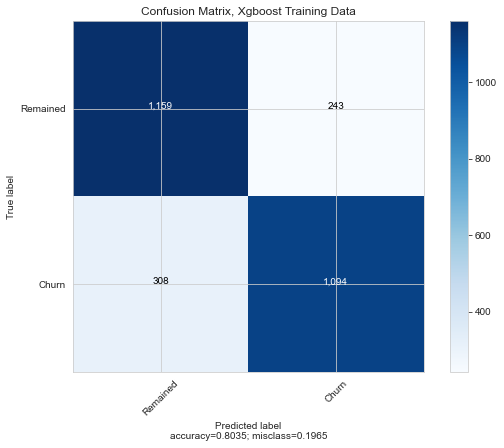

In [80]:
y_pred = XGB_model.predict(X_train)
cm = confusion_matrix(y_train, y_pred)
plot_confusion_matrix(cm=cm,normalize= False,target_names = ['Remained', 'Churn'],
                     title        = "Confusion Matrix, Xgboost Training Data")

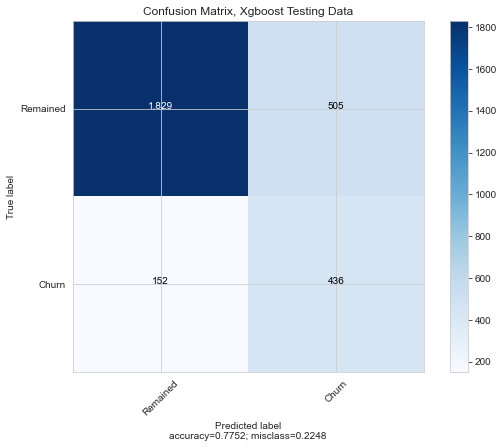

In [81]:
y_pred = best_XGB_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm=cm,normalize= False,target_names = ['Remained', 'Churn'],title        = "Confusion Matrix, Xgboost Testing Data")

In [82]:
eval_classification(best_XGB_model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.78
Precision (Test Set): 0.46
Recall (Test Set): 0.74
F1-Score (Test Set): 0.57
AUC: 0.76


In [83]:


y_pred_prob1 = best_lr_model.predict_proba(X_test)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)


y_pred_prob3 = best_rf_model.predict_proba(X_test)[:,1]
fpr3 , tpr3, thresholds3 = roc_curve(y_test, y_pred_prob1)


y_pred_prob4 = best_XGB_model.predict_proba(X_test)[:,1]
fpr4 , tpr4, thresholds4 = roc_curve(y_test, y_pred_prob4)


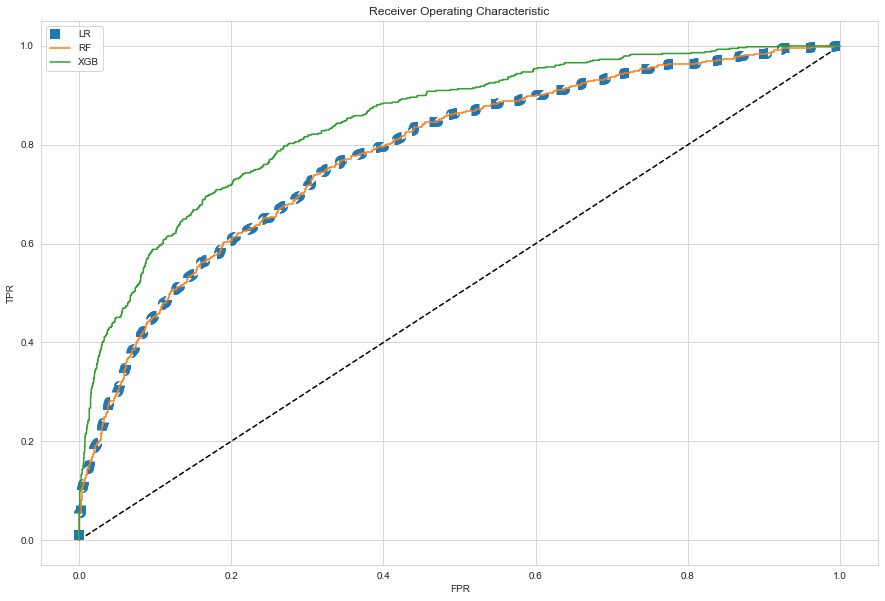

In [84]:
fig, ax = plt.subplots(figsize = (15,10))

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "LR",linestyle=':',linewidth=10)
plt.plot(fpr3, tpr3, label= "RF")
plt.plot(fpr4, tpr4, label= "XGB")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()

Text(0.5, 1.0, 'feature importance score of XGBoost/')

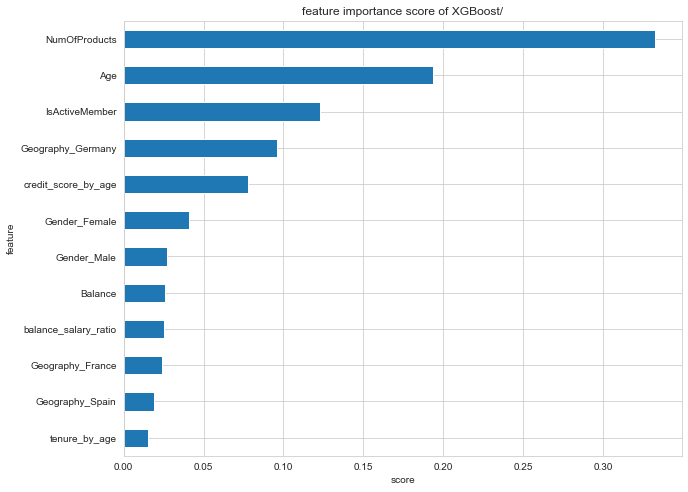

In [85]:
# plt.figsize(10, 8)
feat_importances = pd.Series(best_XGB_model.best_estimator_.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score of XGBoost/')

### Simulation Test



In [95]:
X_Simulation = df.drop(['Surname','CustomerId','Exited','EstimatedSalary','Tenure', 'HasCrCard','CreditScore'],axis=1).sample(n=1000,random_state=42)

In [96]:
X_Simulation['Age']  = np.random.randint(24, 40, 1000)
X_Simulation['IsActiveMember'] = 1
X_Simulation['NumOfProducts'] = 2

In [97]:
y_pred = best_XGB_model.predict(X_Simulation)
X_Simulation['Exited'] = y_pred

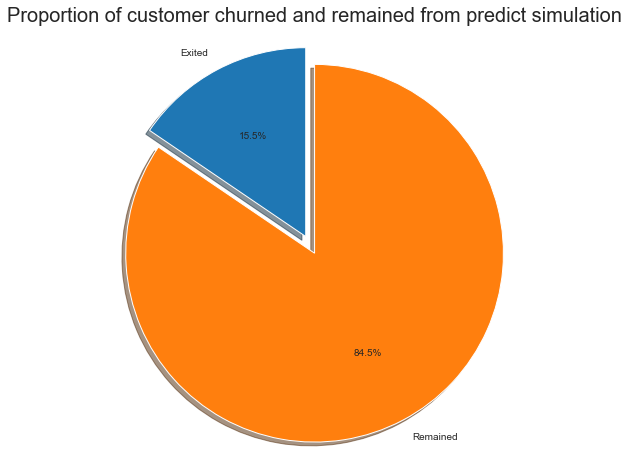

In [98]:
labels = 'Exited', 'Remained'
sizes = [X_Simulation.Exited[X_Simulation['Exited']==1].count(), X_Simulation.Exited[X_Simulation['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and remained from predict simulation", size = 20)
plt.show()